# Project Part 1

A) An introductory proposal section describing what it is your doing to do and where the dataset originates <br>
B) An exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis.

## Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not). Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._

## Exploratory Data Analysis

* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
import matplotlib, numpy, nltk
import sklearn, gensim, wordcloud
import textblob, spacy, textstat
import pandas as pd
import seaborn as sns

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
emoData = pd.read_csv("Project1/dataset/Data-all.csv")
emoData.head(5)

,Statement,Emotion
0,a boyfriend with whom i split up with came ove...,anger
1,a certain friend tried to push me off a seat i...,anger
2,a father of children killed in an accident,sadness
3,a few monthe ago,anger
4,a friend of mine suggested that i become a fil...,joy


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def plot_top_ngrams_barchart(text, n=2):
    stop = set(stopwords.words('english'))
    stop.add("feel")
    stop.add("feeling")
    new = text.str.split()
    new = new.values.tolist()
    corpus = []
    for sentence in new:
        corpus = [word for word in sentence if word not in stop]
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]
    top_n_bigrams = _get_top_ngram(text,n)[:10]
    x, y = map(list, zip(*top_n_bigrams))
    print(("im" in stop))
    sns.barplot(x=y, y=x)

False


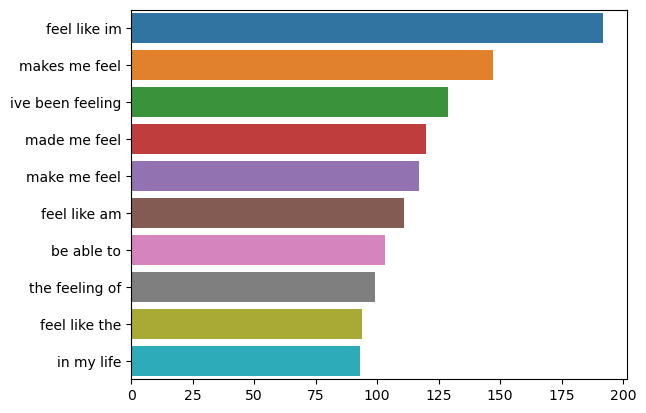

In [56]:
plot_top_ngrams_barchart(emoData['Statement'], 3)